QUANTUM SIMULATION FOR 2 SPIN HEISENBERG MODEL

1. Loading the backend and using the IBM quantum computer

In [ ]:
IBM_API_KEY = "MY KEY"
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=IBM_API_KEY
)

In [208]:
backend = service.backend("ibm_brisbane")#I have taken my backend to be ibm_brisbane as my quantum computer and this will be evaluating my model shot by shot 

In [225]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np
from qiskit.circuit.library import TwoLocal


qc = QuantumCircuit(2)

t = Parameter("Time")
qc.x(0)#I am taking my initial state to be |01>
qc.append(RXXGate(2 * t), [0, 1])
qc.append(RYYGate(2 * t), [0, 1])
qc.append(RZZGate(2 * t), [0, 1])#applying the heisenberg hamiltonian H = J/4*(XX+YY+ZZ) J = 4 in my case
qc.measure_all()             

param_vals = np.linspace(0,np.pi,25)# TI am taking my total time to be pi and my trotter steps to be 25
qc_transpiled = transpile(qc, backend)


pub_qc =  (qc_transpiled, param_vals)
job_qc = sampler.run([pub_qc], shots = 1000)#TOTAL SHOTS = 1000 
result_qc = job_qc.result()

C:\Users\HP\anaconda3\envs\tf\lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:1111: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


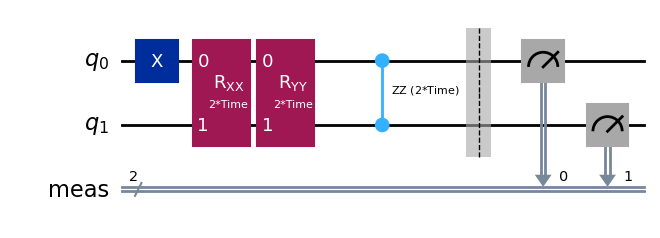

In [230]:
qc.draw("mpl")

In [226]:
result_qc

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(25,), num_shots=1000, num_bits=2>), shape=(25,)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-06-11 10:42:11', stop='2025-06-11 10:42:18', size=25000>)])}, 'version': 2})

In [227]:
data_qc = result_qc[0].data

In [228]:
bits = data_qc.meas
bits

BitArray(<shape=(25,), num_shots=1000, num_bits=2>)

PLOTTING THE GRAPH

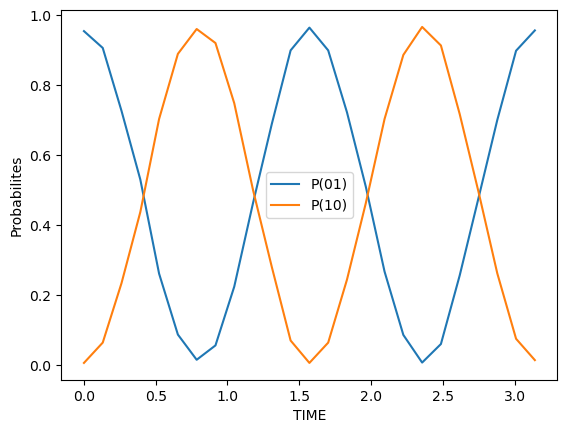

In [236]:
import matplotlib.pyplot as plt

p0s = np.sum(bits.array == 1, axis = 1) / bits.num_shots
p1s = np.sum(bits.array == 2, axis = 1) / bits.num_shots

plt.plot(param_vals, p0s, label = "P(01)")
plt.plot(param_vals, p1s, label = "P(10)")

plt.xlabel("TIME")
plt.ylabel("Probabilites")
plt.legend()
plt.show()

3 SPIN STATE HEISENBERG MODEL

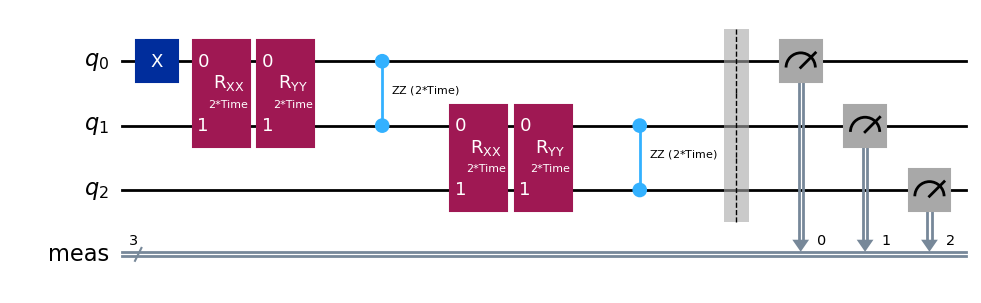

In [238]:
qc2 = QuantumCircuit(3)
t = Parameter("Time")
qc2.x(0)
qc2.append(RXXGate(2 * t), [0, 1])
qc2.append(RYYGate(2 * t), [0, 1])
qc2.append(RZZGate(2 * t), [0, 1])
qc2.append(RXXGate(2 * t), [1,2])
qc2.append(RYYGate(2 * t), [1,2])
qc2.append(RZZGate(2 * t), [1,2])#H = J/4(X1X2 + Y1Y2 + Z1Z2 + X2X3 + Y2Y3 + Z2Z3) AND J = 4 again
qc2.measure_all()
qc2.draw("mpl")           
    

In [241]:
qc2_transpiled = transpile(qc2,backend)

pub_qc2 =  (qc2_transpiled, param_vals)
job_qc2 = sampler.run([pub_qc2], shots = 1000)#TOTAL SHOTS = 1000 
result_qc2 = job_qc2.result()

C:\Users\HP\anaconda3\envs\tf\lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:1111: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


In [242]:
result_qc2

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(25,), num_shots=1000, num_bits=3>), shape=(25,)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-06-11 12:04:25', stop='2025-06-11 12:04:32', size=25000>)])}, 'version': 2})

In [243]:
data_qc2 = result_qc2[0].data

In [250]:
bits2 = data_qc2.meas
bits2

BitArray(<shape=(25,), num_shots=1000, num_bits=3>)

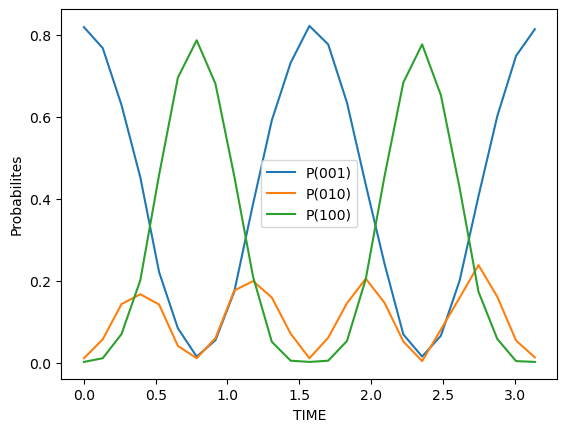

In [251]:
p00s = np.sum(bits2.array == 1, axis = 1) / bits2.num_shots
p11s = np.sum(bits2.array == 2, axis = 1) / bits2.num_shots
p22s = np.sum(bits2.array == 4, axis = 1) / bits2.num_shots
plt.plot(param_vals, p00s, label = "P(001)")
plt.plot(param_vals, p11s, label = "P(010)")
plt.plot(param_vals, p22s,label = "P(100)")
plt.xlabel("TIME")
plt.ylabel("Probabilites")
plt.legend()
plt.show()